In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv('../cleaned Data for crime anylasis.csv')
df1=df.copy()


In [119]:
df1.drop(['index'],axis=1,inplace=True)
df1

,Population Density,Unemployment Rate %,Police Station Distance km,Number of Schools,Average Income,Age Group Ratio (15-24) %,Age Group Ratio (24-44) %,Age Group Ratio (44+) %,Poverty Rate %,School Dropout Rate %,...,Child Living With Single Parent Rate %,CCTV Cameras,Drug Hospital Admissions,Police Patrol Frequency,Emergency Response Time (Mins),Youth Unemployment Rate %,Alcohol OutletDensity,Distance to High Risk_Areas km,Mental Health Services Count,Total Crime in Month
0,283977,5.3,1.3,270,75334,24.4,72.9,2.7,93.4,33.9,...,75.3,787,1774,448,81.5,15.0,250,23.3,185,183
1,409705,35.3,17.3,458,86717,95.2,1.2,3.6,58.7,79.8,...,40.2,394,4150,146,66.5,64.7,370,13.6,338,529
2,112779,92.8,9.8,397,86482,2.6,78.9,18.5,67.4,51.9,...,51.0,82,1802,156,443.8,100.0,383,33.1,310,331
3,633945,40.8,19.9,177,33704,53.7,40.3,6.0,41.7,7.3,...,60.3,843,2671,299,343.6,80.6,203,26.5,160,347
4,607368,5.9,21.7,716,77833,20.1,19.3,60.6,94.5,5.9,...,75.7,520,3569,81,125.3,17.4,343,9.0,16,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,16924,54.0,20.9,241,31803,16.9,82.2,0.8,84.4,70.9,...,52.5,57,60,26,18.8,64.8,7,5.9,33,77
396,33790,41.8,18.4,36,35756,86.5,0.4,13.1,8.1,3.6,...,4.2,76,71,187,15.9,66.1,28,7.4,74,14
397,20377,71.0,7.7,97,40069,32.6,4.3,63.0,34.0,30.7,...,67.6,56,88,49,45.4,100.0,26,2.8,60,83
398,6930,11.4,20.8,216,45671,16.1,39.0,44.9,49.5,32.4,...,31.6,21,47,133,91.6,26.7,37,24.2,22,22


In [120]:
Y=df1.iloc[:,-1:]
X=df1.iloc[:,:-1]





In [121]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=100)

<Axes: >

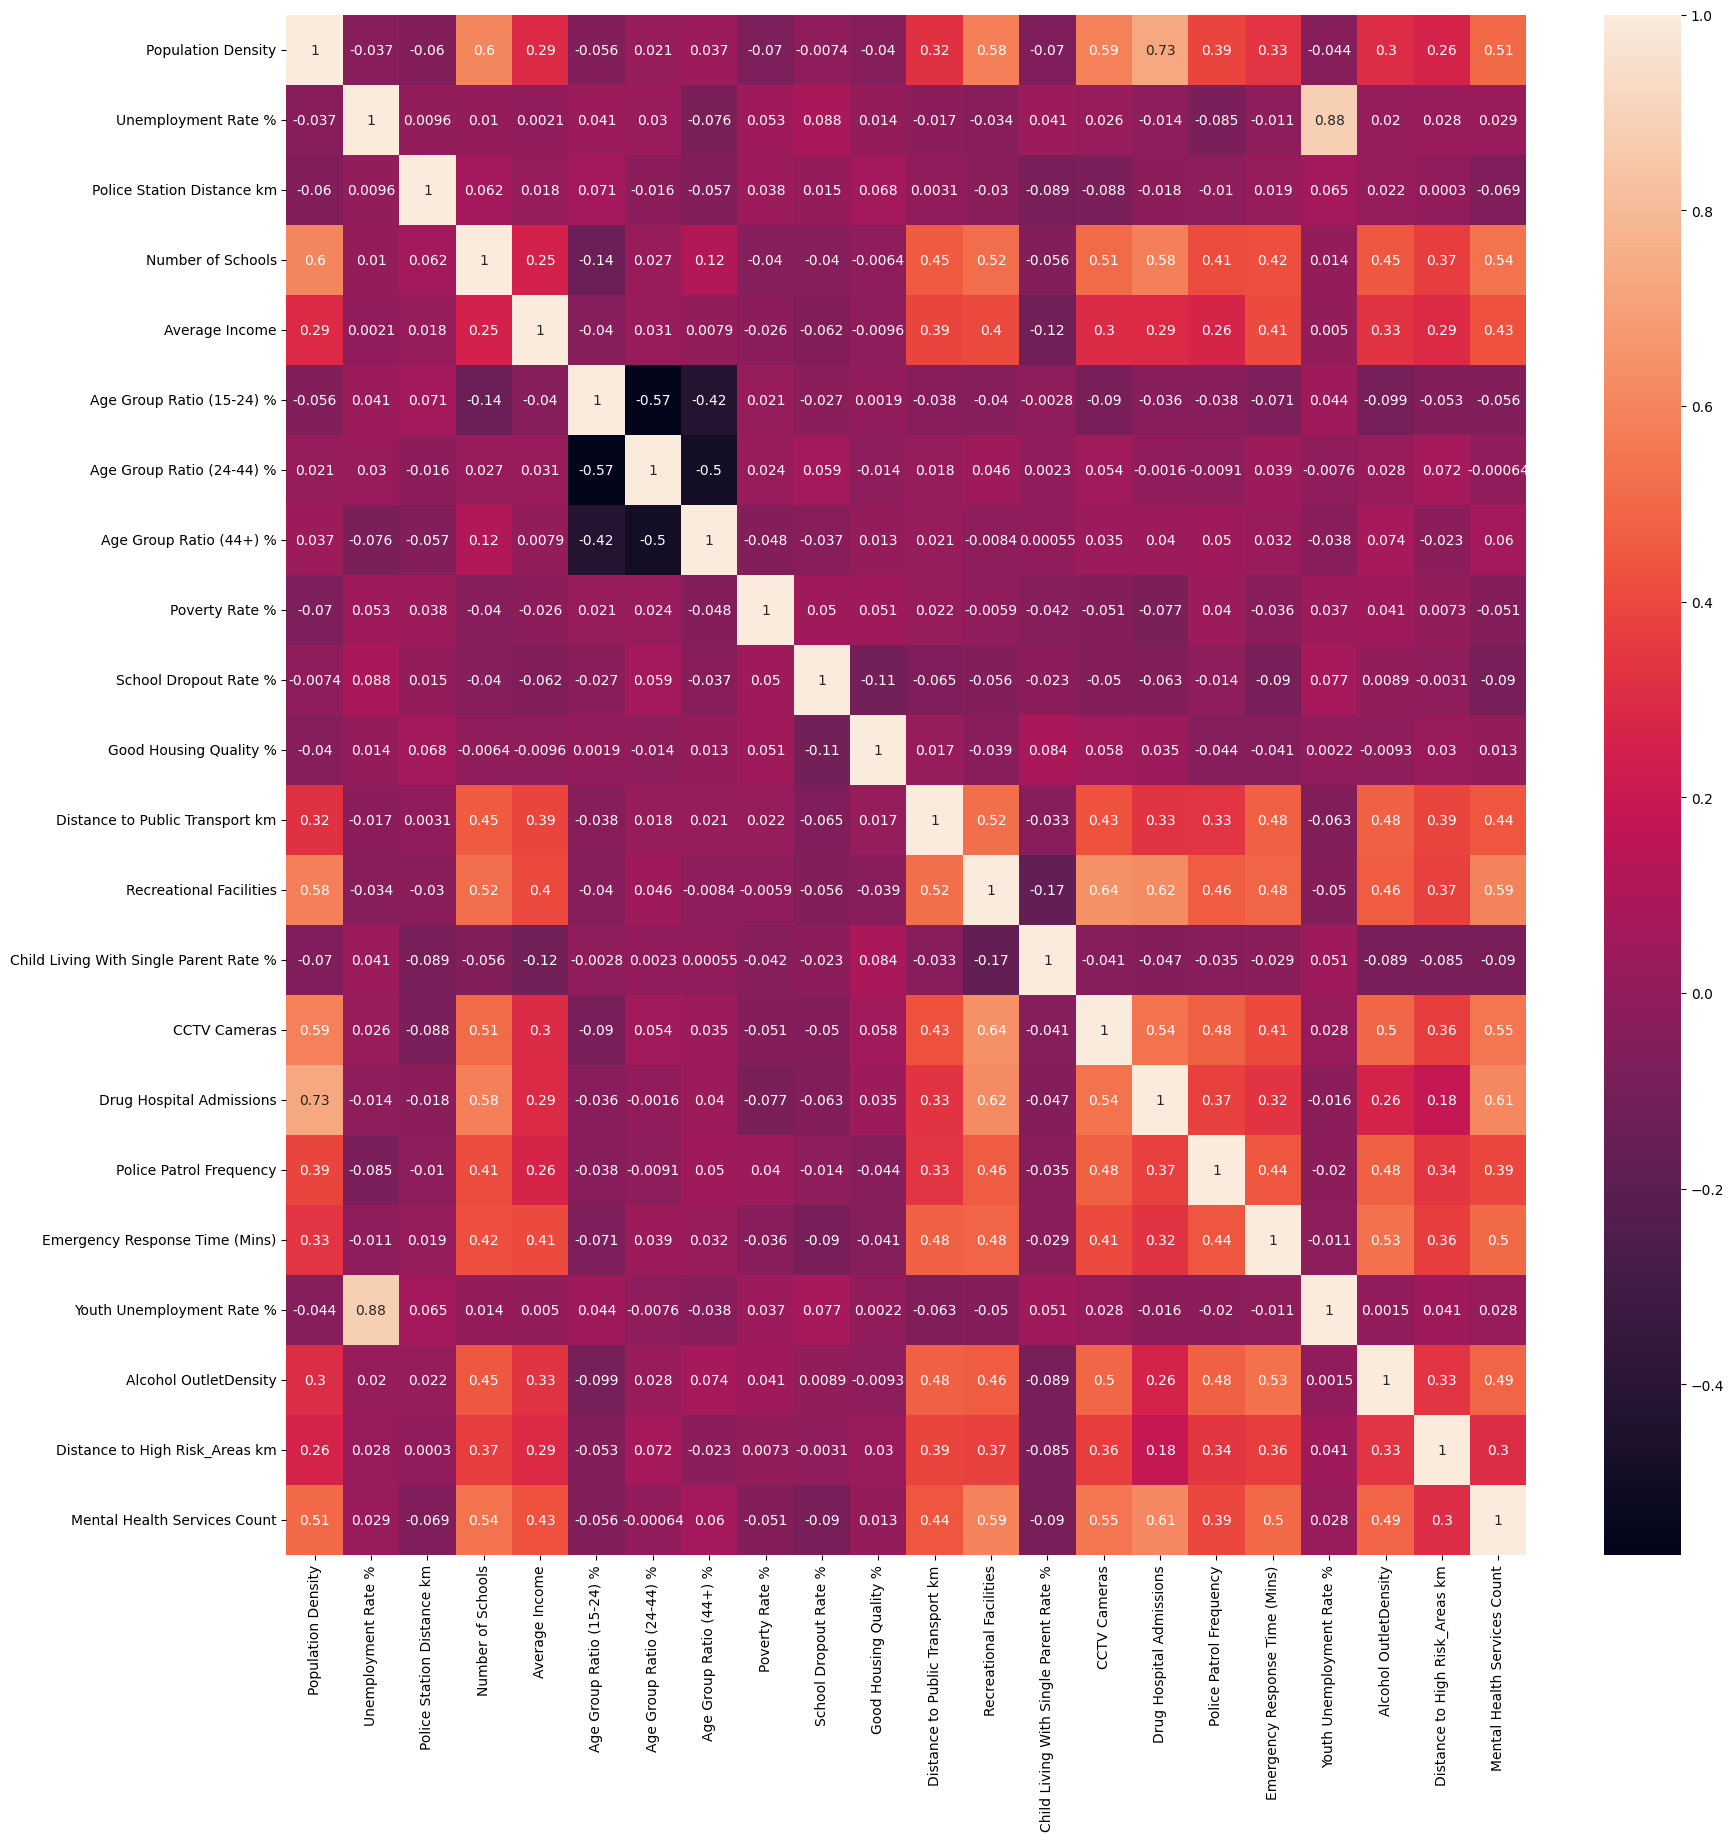

In [122]:
plt.figure(figsize=(20,20))
sns.heatmap(xtrain.corr(),annot=True,)

In [123]:
def correlated_feature(data, threshold):
    col_corr = set()  # Use set to avoid duplicates
    corr_matrix = data.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return list(col_corr)




correlated_feature(xtrain,0.90) # here threshold should be given by domain expert 

# these above feature must be dropped then we do standardrization 



                    

[]

In [124]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.transform(xtest)


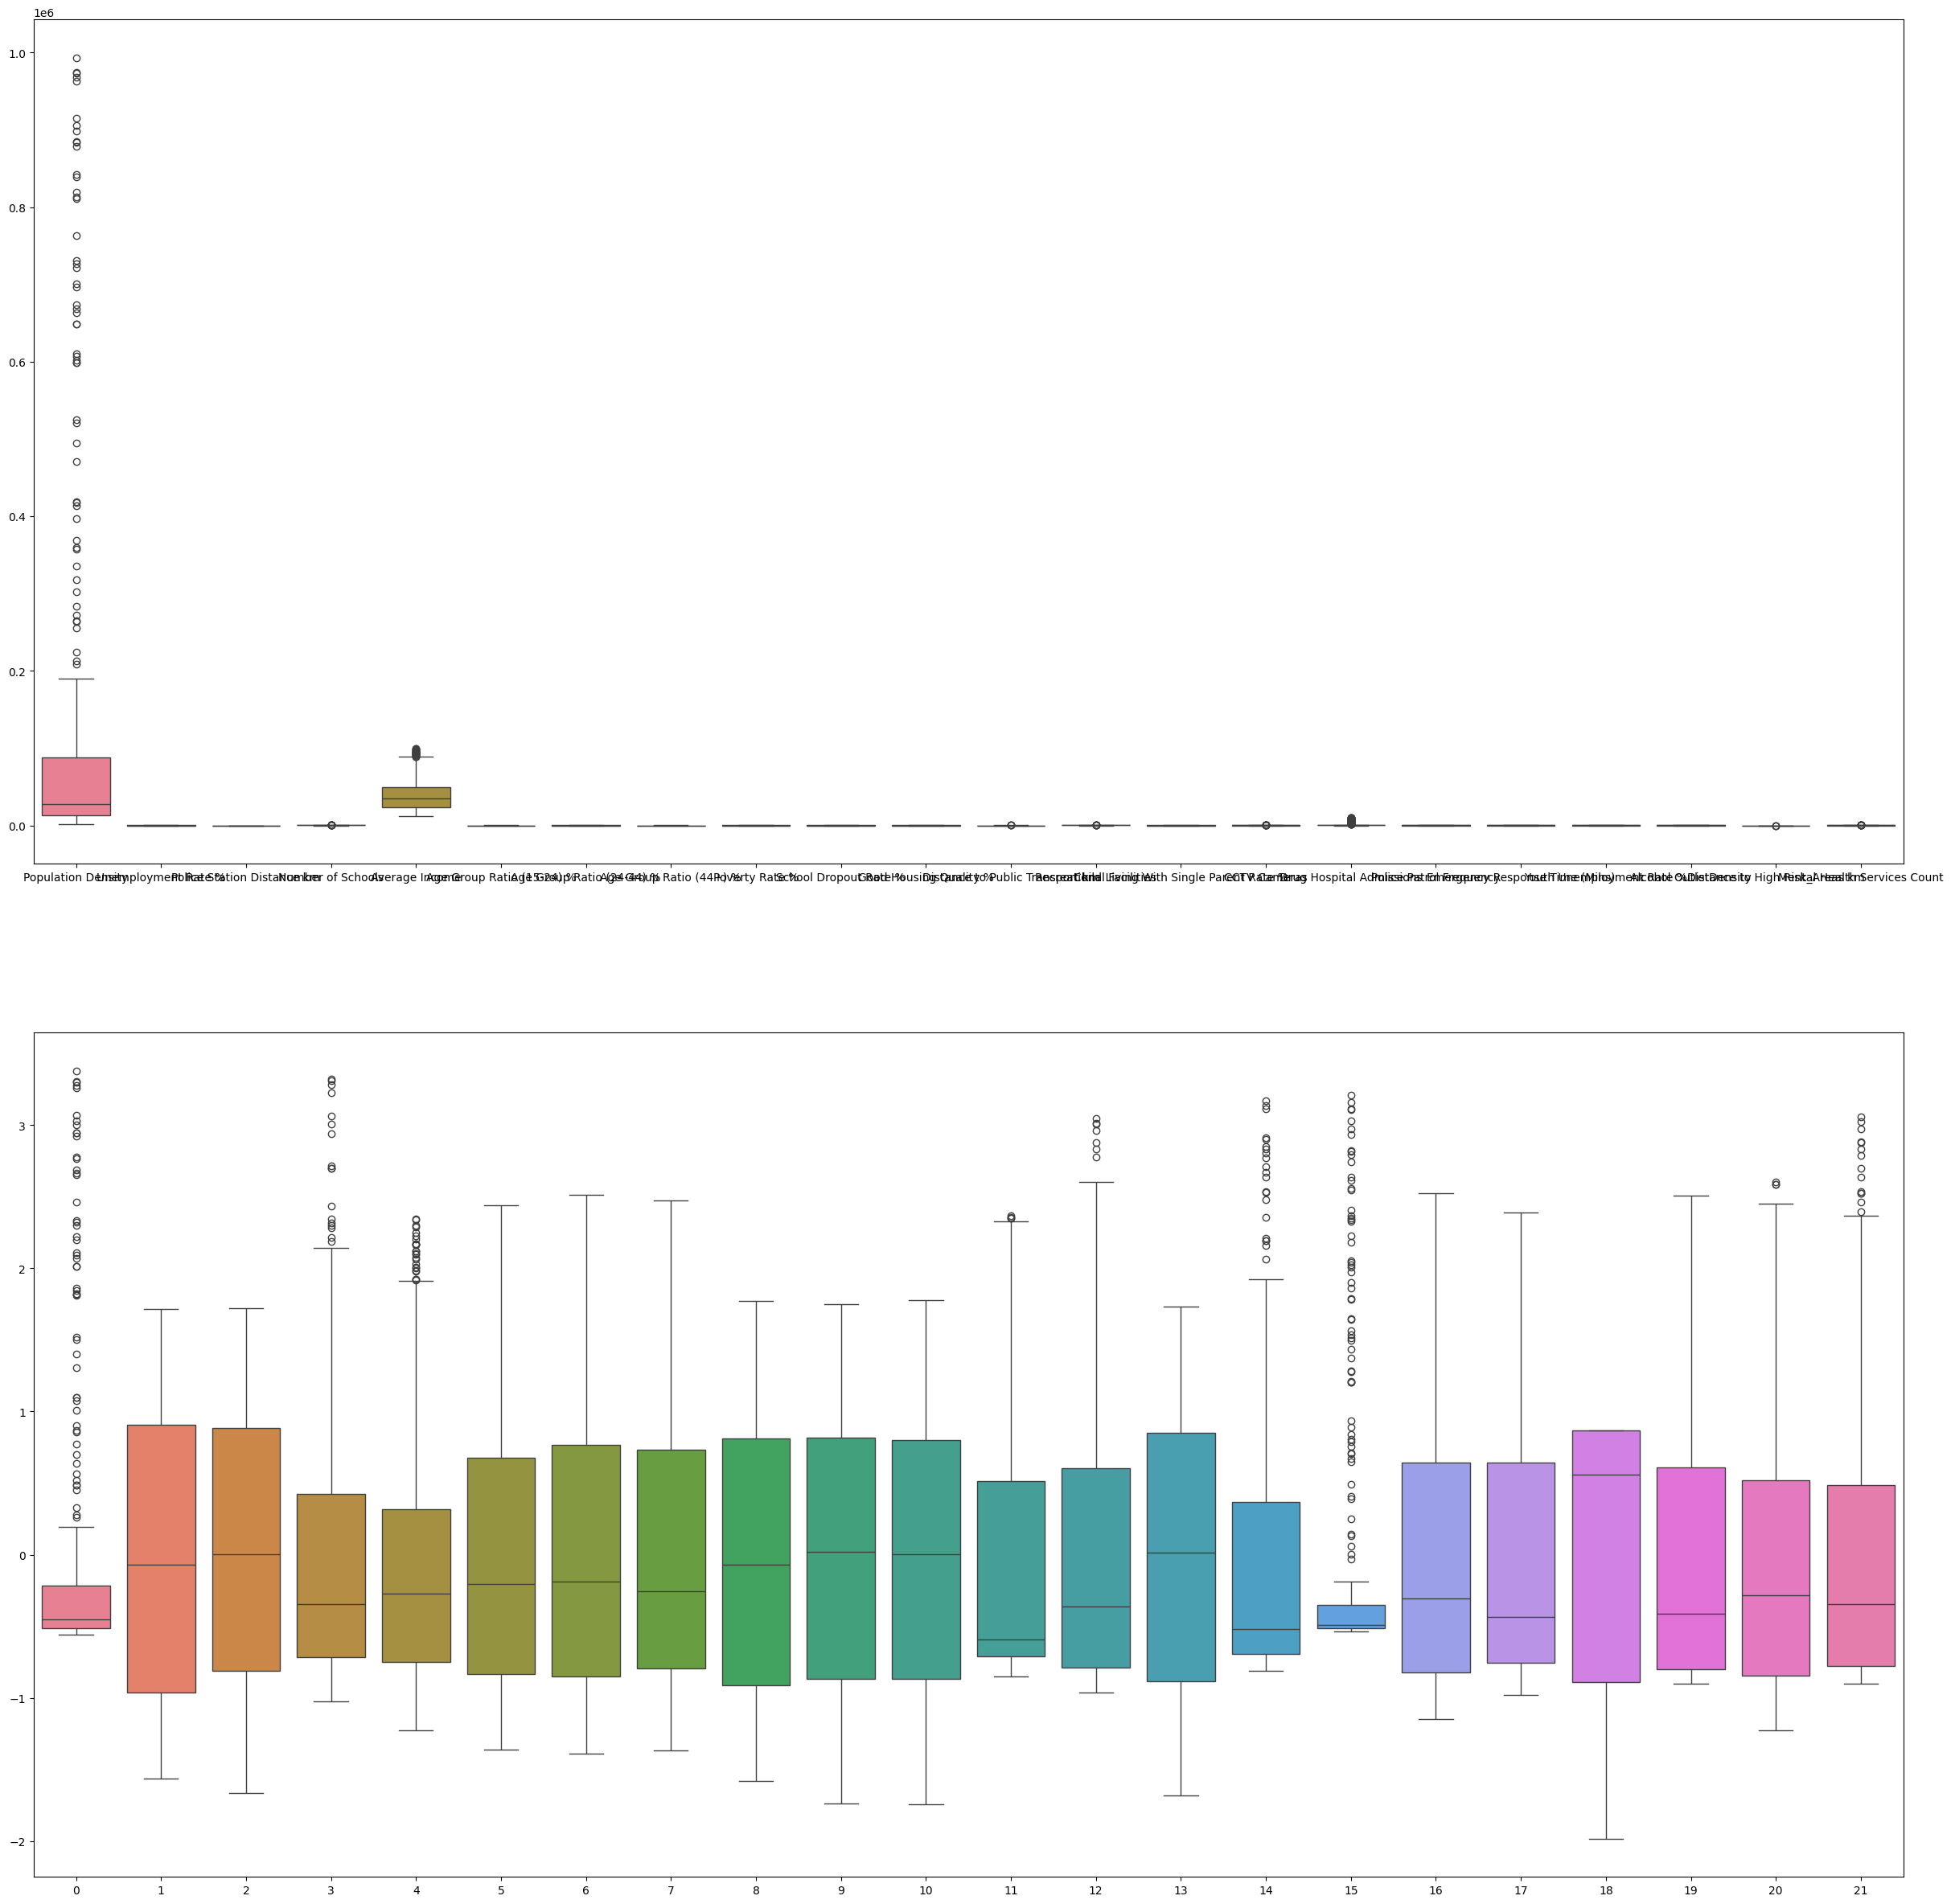

In [125]:
plt.figure(figsize=(30,30))
plt.subplot(2,1,1)
sns.boxplot(data=xtrain)
plt.subplot(2,1,2)
sns.boxplot(data=scaled_xtrain)
plt.show()

# Traing and Testing

[[ 25.40106328  15.88509445  -1.61303501   0.94634215   0.75608762
  326.22306111 339.48031163 308.13276617   8.61678283   1.12290346
    1.28885226  -1.47209626  -0.78514439   0.46706312 -10.56454308
  260.43981991 -12.60236991  -0.68394926   6.72594526  26.93836316
   -3.10671745   1.62234174]] [203.22857143]


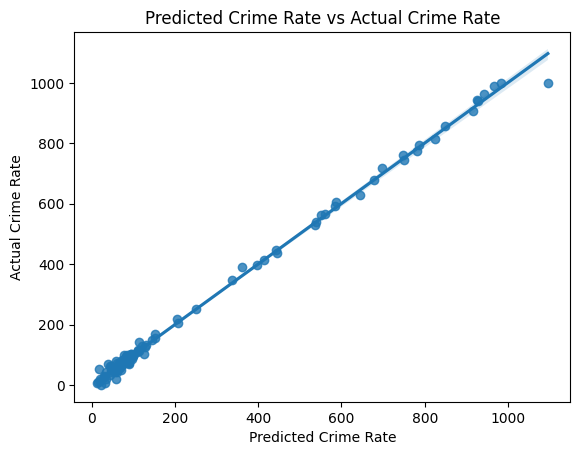

In [126]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(scaled_xtrain,ytrain)
print(LR.coef_,LR.intercept_)
y_pred=LR.predict(scaled_xtest)
sns.regplot(y=ytest,x=y_pred)
plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()



mse 225.6233818069173
mae 9.780867734804765
rmse 15.020765020694428
r2_Score 0.9971228200632656


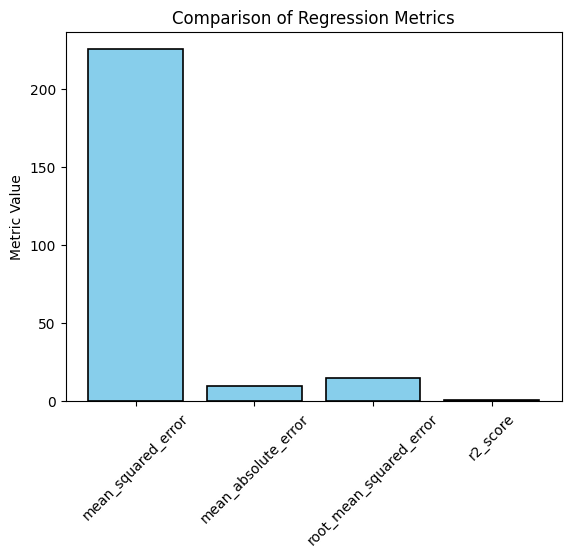

In [127]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

mse=mean_squared_error(ytest,y_pred)
mae=mean_absolute_error(ytest,y_pred)
rmse=root_mean_squared_error(ytest,y_pred)
r2_Score=r2_score(ytest,y_pred)
print('mse',mse)
print('mae',mae)
print('rmse',rmse)
print('r2_Score',r2_Score)

names=['mean_squared_error','mean_absolute_error','root_mean_squared_error','r2_score']
values=[mse,mae,rmse,r2_Score]
plt.bar(names, values, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Comparison of Regression Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()




[ 2.35710889e+01  1.62586587e+01 -1.65072088e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.75869705e-01  0.00000000e+00
  7.49031261e+00  1.67885142e-01  1.81885808e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -7.43664057e+00  2.59225200e+02
 -1.08375114e+01 -0.00000000e+00  5.43528277e+00  2.39310952e+01
 -2.32331909e+00  4.12465429e-01] [203.22857143]


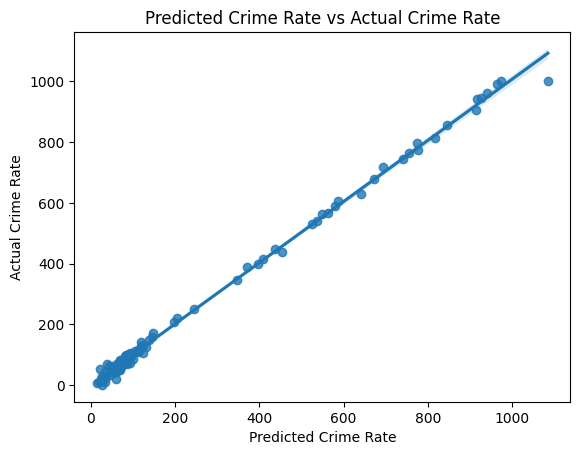

In [128]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(scaled_xtrain,ytrain)
print(lasso.coef_,lasso.intercept_)
y_pred=lasso.predict(scaled_xtest)
sns.regplot(y=ytest,x=y_pred)
plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()

mse 219.80525968356287
mae 10.484628169477434
rmse 14.825830826080637
r2_Score 0.9971970135449373


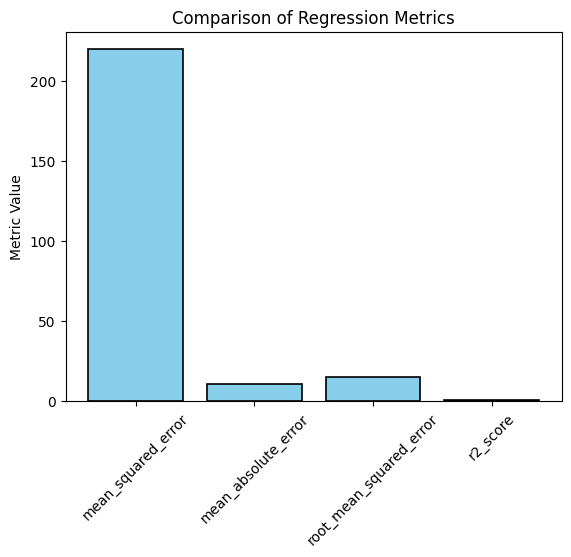

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

mse=mean_squared_error(ytest,y_pred)
mae=mean_absolute_error(ytest,y_pred)
rmse=root_mean_squared_error(ytest,y_pred)
r2_Score=r2_score(ytest,y_pred)
print('mse',mse)
print('mae',mae)
print('rmse',rmse)
print('r2_Score',r2_Score)

names=['mean_squared_error','mean_absolute_error','root_mean_squared_error','r2_score']
values=[mse,mae,rmse,r2_Score]
plt.bar(names, values, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Comparison of Regression Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()

[ 2.63061851e+01  1.58217184e+01 -1.49674296e+00  1.49764513e+00
  6.83336469e-01  5.63210079e-01 -7.72295184e-01  4.89874283e-01
  8.48131031e+00  1.13594545e+00  1.40651835e+00 -1.44590081e+00
  1.07044797e-02  5.70700087e-01 -1.03574447e+01  2.57608689e+02
 -1.23245137e+01 -7.49826950e-01  6.73965240e+00  2.62521290e+01
 -3.41026212e+00  2.34959271e+00] [203.22857143]


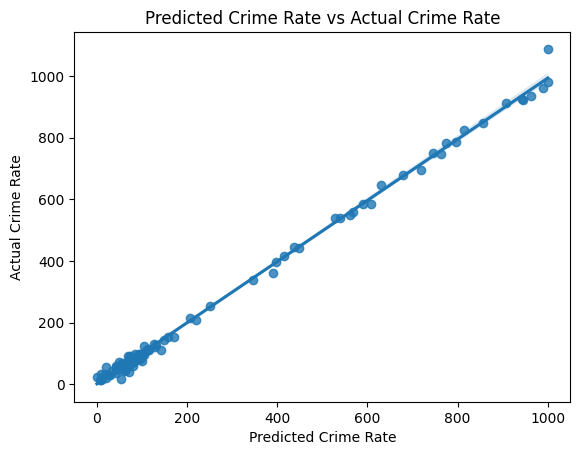

In [130]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(scaled_xtrain,ytrain)
print(ridge.coef_,ridge.intercept_)
y_pred=ridge.predict(scaled_xtest)
sns.regplot(x=ytest,y=y_pred)

plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()

mse 224.60867967428268
mae 10.216198707444878
rmse 14.98695031266477
r2_Score 0.9971357596823529


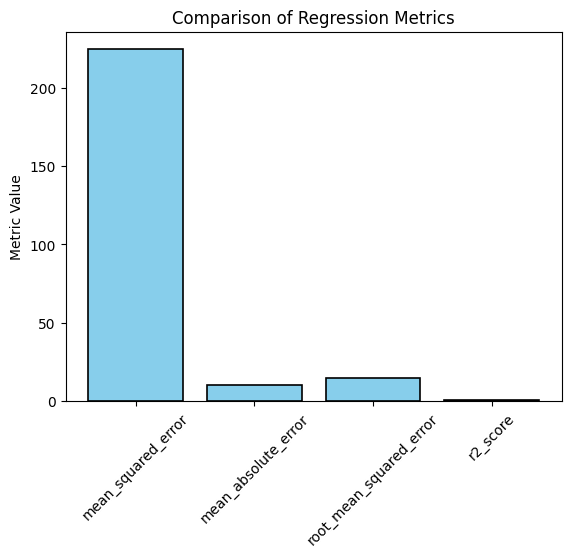

In [131]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

mse=mean_squared_error(ytest,y_pred)
mae=mean_absolute_error(ytest,y_pred)
rmse=root_mean_squared_error(ytest,y_pred)
r2_Score=r2_score(ytest,y_pred)
print('mse',mse)
print('mae',mae)
print('rmse',rmse)
print('r2_Score',r2_Score)

names=['mean_squared_error','mean_absolute_error','root_mean_squared_error','r2_score']
values=[mse,mae,rmse,r2_Score]
plt.bar(names, values, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Comparison of Regression Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()

[ 48.78406016  10.43022322   0.2229653   22.47505229   3.34499315
   0.82793311  -1.50918032   0.           2.23181361   0.
   4.46009716   0.46061314  23.70860783   1.22175729   8.08279614
 126.49645505   0.23420522   0.           6.85796175   3.73260183
  -9.01472331  26.80358579] [203.22857143]


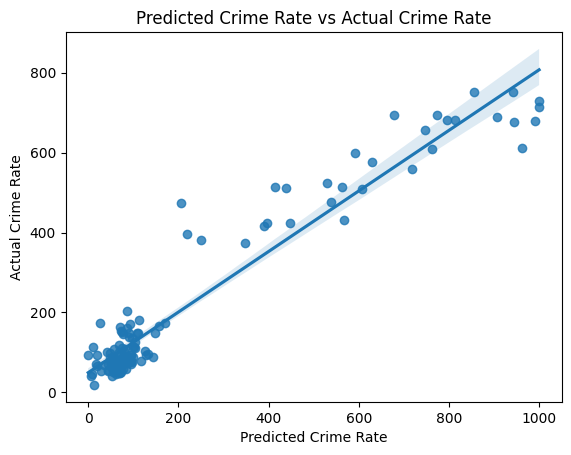

In [132]:
from sklearn.linear_model import ElasticNet

Elastic_Net = ElasticNet()
Elastic_Net.fit(scaled_xtrain,ytrain)
print(Elastic_Net.coef_,Elastic_Net.intercept_)
y_pred=Elastic_Net.predict(scaled_xtest)
sns.regplot(x=ytest,y=y_pred)

plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()

mse 8061.580149098715
mae 56.317260891705956
rmse 89.78630268085837
r2_Score 0.8971976375958572


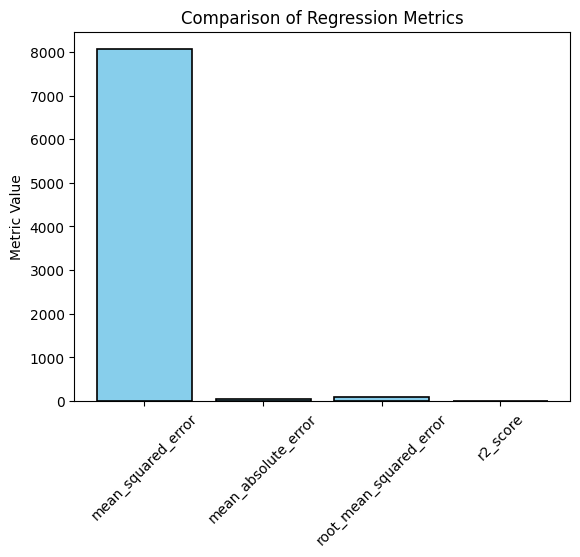

In [133]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

mse=mean_squared_error(ytest,y_pred)
mae=mean_absolute_error(ytest,y_pred)
rmse=root_mean_squared_error(ytest,y_pred)
r2_Score=r2_score(ytest,y_pred)
print('mse',mse)
print('mae',mae)
print('rmse',rmse)
print('r2_Score',r2_Score)

names=['mean_squared_error','mean_absolute_error','root_mean_squared_error','r2_score']
values=[mse,mae,rmse,r2_Score]
plt.bar(names, values, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Comparison of Regression Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\MUHAMMAD AFZAL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 48.10348038  12.25923916   0.29824185  18.63175323   2.05850795
   0.84040912  -1.49363853   0.           4.04416099   0.35817012
   4.53028729  -0.32468096  20.24672264   1.59248563   2.44227671
 158.01193189  -2.51188698  -0.90416029   7.32028836   6.55707143
 -10.00967543  23.73925337] 203.22857142857143


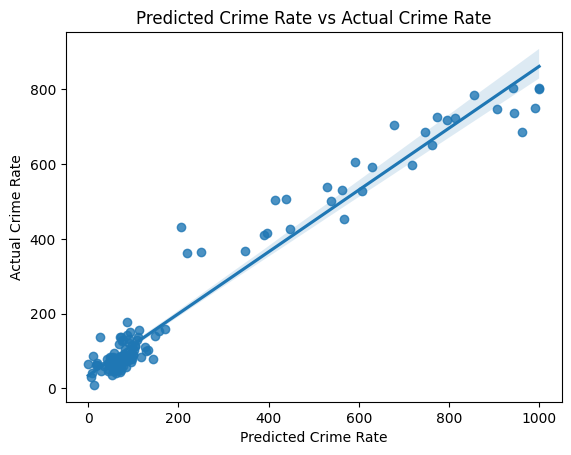

Mean Absolute Error: 43.06362376112714
Mean Squared Error: 4713.899584144447
Root Mean Squared Error: 68.65784430161237
R-squared Score: 0.9398877137703415


In [134]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

Elastic_Net_CV = ElasticNetCV(cv=5)

Elastic_Net_CV.fit(scaled_xtrain,ytrain)
print(Elastic_Net_CV.coef_,Elastic_Net_CV.intercept_)
y_pred=Elastic_Net_CV.predict(scaled_xtest)
sns.regplot(x=ytest,y=y_pred)

plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R-squared Score:', r2_score(ytest, y_pred))




[ 2.55075299e+01  1.58798742e+01 -1.57366291e+00  1.05547933e+00
  6.83566889e-01  1.50979552e+00  2.47759252e-01  1.40320067e+00
  8.56436017e+00  1.14176268e+00  1.28281082e+00 -1.42236108e+00
 -6.27970961e-01  5.03765338e-01 -1.05314196e+01  2.60045687e+02
 -1.25428947e+01 -6.79338592e-01  6.70582545e+00  2.68201190e+01
 -3.14836957e+00  1.66480683e+00] [203.22857143]


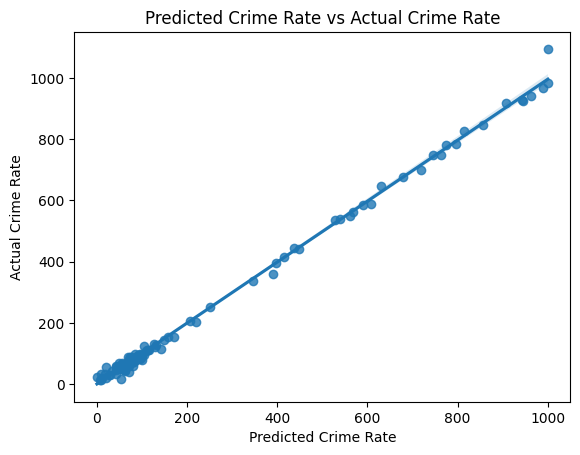

Mean Absolute Error: 9.826036621237419
Mean Squared Error: 223.80733346735266
Root Mean Squared Error: 14.96019162535536
R-squared Score: 0.997145978557766


In [135]:
Ridge_reg_CV = RidgeCV(cv=5)

Ridge_reg_CV.fit(scaled_xtrain,ytrain)
print(Ridge_reg_CV.coef_,Ridge_reg_CV.intercept_)
y_pred=Ridge_reg_CV.predict(scaled_xtest)
sns.regplot(x=ytest,y=y_pred)

plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R-squared Score:', r2_score(ytest, y_pred))


[ 2.49225139e+01  1.59531974e+01 -1.19768500e+00  5.24640056e-01
  1.39437470e-01  0.00000000e+00 -1.05896648e+00  0.00000000e+00
  8.26323060e+00  8.85635696e-01  9.62125715e-01 -9.93582784e-01
 -2.37675703e-01  2.02139637e-01 -9.79427206e+00  2.60019786e+02
 -1.21344212e+01 -1.83637330e-01  6.41998341e+00  2.60333714e+01
 -2.90261312e+00  1.26978490e+00] 203.22857142857143


C:\Users\MUHAMMAD AFZAL\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


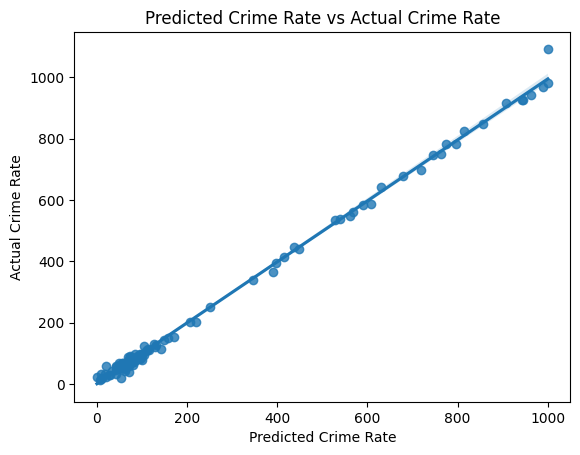

Mean Absolute Error: 9.841879957023373
Mean Squared Error: 216.7781737123312
Root Mean Squared Error: 14.723388662679907
R-squared Score: 0.997235615355412


In [136]:
Lasso_Reg_CV = LassoCV(cv=5)

Lasso_Reg_CV.fit(scaled_xtrain,ytrain)
print(Lasso_Reg_CV.coef_,Lasso_Reg_CV.intercept_)
y_pred=Lasso_Reg_CV.predict(scaled_xtest)
sns.regplot(x=ytest,y=y_pred)

plt.xlabel('Predicted Crime Rate')
plt.ylabel('Actual Crime Rate')
plt.title('Predicted Crime Rate vs Actual Crime Rate')
plt.show()

print('Mean Absolute Error:', mean_absolute_error(ytest, y_pred))
print('Mean Squared Error:', mean_squared_error(ytest, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(ytest, y_pred)))
print('R-squared Score:', r2_score(ytest, y_pred))


In [137]:
Elastic_Net
scaler


,copy,True
,with_mean,True
,with_std,True


In [138]:
import pickle

pickle.dump(scaler,open('../models/scaler.pkl','wb'))
pickle.dump(Elastic_Net_CV,open('../models/Elastic_Net_CV.pkl','wb'))


# New Prediction

In [139]:
Elastic_Net_CV.predict(scaler.transform([[35000,10,1,40,50000,30,30,30,30,20,40,30,20,10,100,20,200,40,20,2,1,4]]))

C:\Users\MUHAMMAD AFZAL\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([15.13097509])